Solving the [2023 Week 3 Homework](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/03-classification/homework.md)

# Section 1

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('data/car-price.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
columns = [
    "Make",
    "Model",
    "Year",
    "Engine HP",
    "Engine Cylinders",
    "Transmission Type",
    "Vehicle Style",
    "highway MPG",
    "city mpg",
    "MSRP",
]

data = data[columns]
data.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [9]:
# normalise column names
data.columns = data.columns.str.replace(' ', '_').str.lower()

# replace Nulls with 0s
data = data.fillna(0)

# renames target variable
data = data.rename(columns={"msrp": "price"})


In [10]:
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


# Section 2

## Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

In [11]:
data['transmission_type'].mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

In [12]:
data['transmission_type'].value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

**Answer**: AUTOMATIC

## Question 2

Create the correlation matrix for the numerical features of your dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

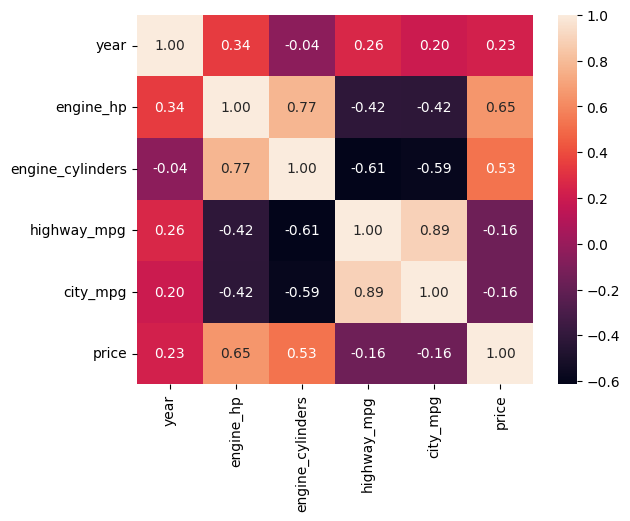

In [13]:
_ = sns.heatmap((
    data.select_dtypes('number')
    .corr()
), annot=True, fmt='.2f')

**Answer**: `highway_mpg` and `city_mpg`

# Section 3

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is **1** if the `price` is above its mean value and **0** otherwise.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [14]:
avg_price = np.mean(data['price'])
avg_price

40594.737032063116

In [15]:
data['above_average'] = (data.price > avg_price).astype(int)

minus_price= data.copy()
del minus_price['price']

minus_price.sample(7)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
7478,Volkswagen,Passat,2016,170.0,4.0,AUTOMATIC,Sedan,38,25,0
8200,Dodge,Ram Pickup 1500,2010,310.0,8.0,AUTOMATIC,Crew Cab Pickup,18,13,0
984,Volvo,940,1993,114.0,4.0,AUTOMATIC,Sedan,25,17,0
5581,Lexus,GS 400,1998,300.0,8.0,AUTOMATIC,Sedan,21,15,0
9070,Chrysler,Sebring,2010,173.0,4.0,AUTOMATIC,Convertible,29,20,0
11603,Volvo,XC60,2017,302.0,4.0,AUTOMATIC,4dr SUV,29,20,1
9444,Chevrolet,Silverado 1500 Classic,2007,195.0,6.0,MANUAL,Regular Cab Pickup,21,15,0


Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to **42**.
* Make sure that the target value (`price`) is not in your dataframe.

In [17]:
# splits data into train, val, and test
train_df, test_df = train_test_split(minus_price, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

X_train = train_df.reset_index(drop=True).copy()
y_train = X_train.pop('above_average')

len(X_train), len(y_train), len(val_df), len(test_df), type(X_train), type(y_train)

(7148,
 7148,
 2383,
 2383,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

## Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset.
Use the training set only.
* Round the scores to 2 decimals using round(score, 2).

Which of these variables has the lowest mutual information score?

In [21]:
for col in X_train.select_dtypes('object').columns:
    mi = round(mutual_info_score(train_df.above_average, train_df[col]), 2)
    print("%s: %.2f" % (col, mi))

make: 0.24
model: 0.46
transmission_type: 0.02
vehicle_style: 0.08


**Answer**: `transmission_type`

## Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

In [22]:
train_dicts = X_train.to_dict(orient='records')  # converts the training data to dicts
dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)

# one hot encoding for columns with string values in the training data
X_train_ohe = dv.transform(train_dicts)

list(zip(dv.feature_names_, X_train_ohe[0]))

[('city_mpg', 15.0),
 ('engine_cylinders', 6.0),
 ('engine_hp', 225.0),
 ('highway_mpg', 19.0),
 ('make=Acura', 0.0),
 ('make=Alfa Romeo', 0.0),
 ('make=Aston Martin', 0.0),
 ('make=Audi', 0.0),
 ('make=BMW', 0.0),
 ('make=Bentley', 0.0),
 ('make=Bugatti', 0.0),
 ('make=Buick', 0.0),
 ('make=Cadillac', 0.0),
 ('make=Chevrolet', 0.0),
 ('make=Chrysler', 0.0),
 ('make=Dodge', 0.0),
 ('make=FIAT', 0.0),
 ('make=Ferrari', 0.0),
 ('make=Ford', 0.0),
 ('make=GMC', 0.0),
 ('make=Genesis', 0.0),
 ('make=HUMMER', 0.0),
 ('make=Honda', 0.0),
 ('make=Hyundai', 0.0),
 ('make=Infiniti', 0.0),
 ('make=Kia', 0.0),
 ('make=Lamborghini', 0.0),
 ('make=Land Rover', 0.0),
 ('make=Lexus', 0.0),
 ('make=Lincoln', 0.0),
 ('make=Lotus', 0.0),
 ('make=Maserati', 0.0),
 ('make=Maybach', 0.0),
 ('make=Mazda', 0.0),
 ('make=McLaren', 0.0),
 ('make=Mercedes-Benz', 0.0),
 ('make=Mitsubishi', 1.0),
 ('make=Nissan', 0.0),
 ('make=Oldsmobile', 0.0),
 ('make=Plymouth', 0.0),
 ('make=Pontiac', 0.0),
 ('make=Porsche', 0

In [23]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train_ohe, y_train)


LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [24]:
X_val = val_df.reset_index(drop=True).copy()
y_val = X_val.pop('above_average')

val_dicts = X_val.to_dict(orient='records')

X_val_ohe = dv.transform(val_dicts)

X_val_ohe

array([[2.300e+01, 4.000e+00, 2.100e+02, ..., 0.000e+00, 0.000e+00,
        2.015e+03],
       [1.700e+01, 6.000e+00, 3.540e+02, ..., 0.000e+00, 0.000e+00,
        2.015e+03],
       [2.200e+01, 4.000e+00, 1.400e+02, ..., 1.000e+00, 0.000e+00,
        2.005e+03],
       ...,
       [1.200e+01, 6.000e+00, 1.900e+02, ..., 0.000e+00, 0.000e+00,
        2.003e+03],
       [1.400e+01, 8.000e+00, 4.300e+02, ..., 0.000e+00, 0.000e+00,
        2.015e+03],
       [1.800e+01, 6.000e+00, 3.210e+02, ..., 1.000e+00, 0.000e+00,
        2.015e+03]])

In [25]:
y_pred = model.predict(X_val_ohe)  # predictions 
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [27]:
val_acc = accuracy_score(y_val, y_pred)
round(val_acc, 2)

0.95

**Answer**: 0.95

# Section 4

In [36]:
from sklearn.pipeline import Pipeline
from tqdm import tqdm

In [37]:
def get_X_y(df):
    
    X = df.reset_index(drop=True).copy()
    y = X.pop('above_average').values
    dicts = X.to_dict(orient='records')

    return dicts, y


def train_logistic(df, solver="liblinear", C=10, max_iter=1000, random_state=42):
    """
    Trains a logistic regression model on passed Dataframe.
    """
    dicts, y = get_X_y(df)
    
    estimators = [('dv', DictVectorizer(sparse=False)), 
                  ('logistic', LogisticRegression(solver=solver, C=C, max_iter=max_iter, random_state=random_state))]
    pipe = Pipeline(estimators)
    pipe.fit(dicts, y)

    return pipe


In [38]:
m1 = train_logistic(train_df)
y_pred_m1 = m1.predict(val_dicts)

orig_accuracy = accuracy_score(y_val, y_pred_m1)
round(orig_accuracy, 2)

0.95

## Question 5

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

In [40]:
feats = ["year", "engine_hp", "transmission_type", "city_mpg"]
scores = []

for feat in tqdm(feats):
    columns_ = list(train_df.columns).copy()
    columns_.remove(feat)
    train_df_ = train_df[columns_].copy()

    # train model
    pipe_ = train_logistic(train_df_)

    # make predicitons 
    val_df_ = val_df[columns_].copy()
    val_dicts_, y_val_ = get_X_y(val_df_)
    y_pred_ = pipe_.predict(val_dicts_)

    # calculate accuracy scores
    acc = accuracy_score(y_val_, y_pred_)
    print("%s %.2f" % (feat, acc))
    scores.append(acc)


 50%|████████████████████████████████████████████████▌                                                | 2/4 [00:00<00:00,  6.22it/s]

year 0.95
engine_hp 0.93


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.22it/s]

transmission_type 0.95
city_mpg 0.93


In [41]:
orig_accuracy - scores

array([-0.00293747,  0.0172052 ,  0.        ,  0.01258917])

In [42]:
feats[(orig_accuracy - scores).argmin()]

'year'

**Answer**: `year`

# Section 5

In [43]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

## Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to **42**.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

In [44]:
data_reg = data.copy()

del data_reg['above_average']
data_reg.price = np.log1p(data_reg.price)
data_reg.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,10.739349
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,10.612779
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,10.500977
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,10.290483
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,10.448744


In [45]:
# splits data

train_reg, test_reg = train_test_split(data_reg, test_size=0.2, random_state=42)
train_reg, val_reg = train_test_split(train_reg, test_size=0.25, random_state=42)

X_train_reg = train_reg.reset_index(drop=True).copy()
y_train_reg = X_train_reg.pop('price')

X_val_reg = val_reg.reset_index(drop=True).copy()
y_val_reg = X_val_reg.pop('price')

len(X_train_reg), len(y_train_reg), len(val_reg), len(test_reg), type(X_train_reg), type(y_train_reg)

(7148,
 7148,
 2383,
 2383,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [46]:
train_dicts_reg = X_train_reg.to_dict(orient='records')
val_dicts_reg = X_val_reg.to_dict(orient='records')
rmse_scores = []

# alpha controls the regularization of the model
alphas = [0, 0.01, 0.1, 1, 10]

for a in alphas:
    estimators = [('dv', DictVectorizer(sparse=False)), 
                  ('linreg', Ridge(alpha=a, solver="sag", random_state=42))]
    pipe_reg = Pipeline(estimators)
    
    pipe_reg.fit(train_dicts_reg, y_train_reg)
    y_pred_reg = pipe_reg.predict(val_dicts_reg)
    
    rmse_score = mean_squared_error(y_val_reg, y_pred_reg, squared=False)
    rmse_scores.append(rmse_score)


C:\Users\devsn\.virtualenvs\ML-Zoomcamp-pE8Q0XHq\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\devsn\.virtualenvs\ML-Zoomcamp-pE8Q0XHq\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\devsn\.virtualenvs\ML-Zoomcamp-pE8Q0XHq\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\devsn\.virtualenvs\ML-Zoomcamp-pE8Q0XHq\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\devsn\.virtualenvs\ML-Zoomcamp-pE8Q0XHq\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

In [47]:
(np.array(rmse_scores)).round(3)

array([0.487, 0.487, 0.487, 0.487, 0.487])

**Answer**: 0